## PCA

In [1]:
!pip install bioinfokit

In [2]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from bioinfokit.analys import get_data
import numpy as np
import pandas as pd


df = get_data('gexp').data
df.head()

,A,B,C,D,E,F
0,4.50570,3.260360,-1.249400,8.898070,8.059550,-0.842803
1,3.50856,1.660790,-1.856680,-2.573360,-1.373700,1.196000
2,4.44701,3.411940,-1.040870,10.271195,10.517256,0.272272
3,2.16003,3.146520,0.982809,9.024300,6.058320,-2.967420
4,2.35701,0.452589,-1.910680,12.984239,10.019605,-2.939020


In [3]:
df_st =  StandardScaler().fit_transform(df)  
pd.DataFrame(df_st, columns=df.columns).head()

,A,B,C,D,E,F
0,0.619654,0.448280,-0.240867,2.457058,2.304732,-0.331489
1,0.342286,-0.041499,-0.428652,-1.214732,-0.877151,0.474930
2,0.603329,0.494693,-0.176385,2.896569,3.133729,0.109563
3,-0.032825,0.413423,0.449383,2.497462,1.629707,-1.171850
4,0.021968,-0.411444,-0.445350,3.764964,2.965869,-1.160617


In [4]:
pca_out = PCA().fit(df_st)


pca_out.explained_variance_ratio_

array([0.2978742 , 0.27481252, 0.23181442, 0.19291638, 0.00144353,
       0.00113895])

In [5]:
np.cumsum(pca_out.explained_variance_ratio_)

array([0.2978742 , 0.57268672, 0.80450114, 0.99741752, 0.99886105,
       1.        ])

In [6]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
A,-0.510898,0.452234,0.227356,-0.323464,0.614881,0.008372
B,-0.085908,0.401197,0.708556,0.132788,-0.558448,-0.010616
C,0.477477,-0.100994,0.462437,0.487951,0.556605,0.007893
D,0.370318,0.611485,-0.308295,0.054973,-0.007642,0.625159
E,0.568491,0.300118,-0.011775,-0.484115,0.009382,-0.593425
F,0.208090,-0.400426,0.370440,-0.634234,-0.010111,0.506732


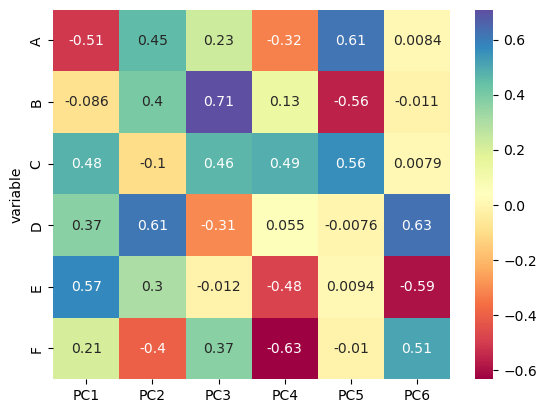

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [8]:
pca_out.explained_variance_

array([1.78994905, 1.65136965, 1.39299071, 1.15924943, 0.0086743 ,
       0.00684401])

In [9]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])

In [10]:
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

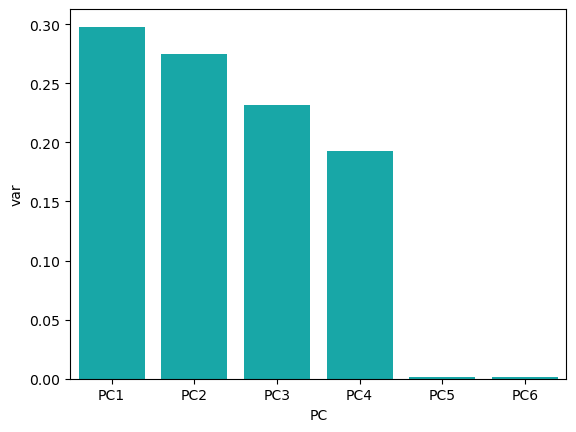

In [11]:
df = pd.DataFrame({'var':pca_out.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

## Regresión

In [12]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [13]:
num_samples_total = 150
cluster_centers = [(3,3), (3.3, 3.3), (3.6, 3.6), (4, 4)]
num_features = 2


X, _ = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_features, center_box=(0, 1), cluster_std = 0.10)


In [14]:
X.shape

(150, 2)

In [15]:
X[:,0].reshape(-1,1).shape

(150, 1)

In [16]:
num_samples_total = 150
cluster_centers = [(3,3), (3.3, 3.3), (3.6, 3.6), (4, 4)]
num_features = 2


X, _ = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_features, center_box=(0, 1), cluster_std = 0.10)


y = X[:,1].reshape(-1, 1)
X = X[:,0].reshape(-1, 1)

In [17]:
reg = LinearRegression().fit(X, y)
print('y = {}x + {}'.format(reg.coef_[0][0], reg.intercept_[0]))

y = 0.8937224860087983x + 0.36696724967693717


In [18]:
y_pred = reg.predict(X)

y_pred

array([[3.95426228],
       [3.14397493],
       [3.46162718],
       [3.9033673 ],
       [3.86519157],
       [2.95266638],
       [3.23156502],
       [3.87424406],
       [3.86880433],
       [3.35308416],
       [3.5088034 ],
       [3.58837368],
       [3.94644258],
       [3.47968403],
       [3.63468294],
       [3.34785853],
       [3.74736047],
       [4.05555208],
       [3.67090096],
       [3.83834751],
       [4.14190035],
       [3.03523123],
       [3.10911747],
       [3.22009885],
       [3.08492411],
       [3.15659839],
       [3.97388587],
       [3.66593554],
       [3.00385012],
       [3.95852688],
       [3.56561623],
       [3.33040643],
       [3.4267058 ],
       [3.43529359],
       [3.06642605],
       [3.0476657 ],
       [3.77333249],
       [3.52187179],
       [3.78843179],
       [3.29580222],
       [3.33541792],
       [3.9888527 ],
       [3.31399304],
       [3.47168369],
       [3.91551395],
       [3.16853955],
       [3.21715954],
       [3.993

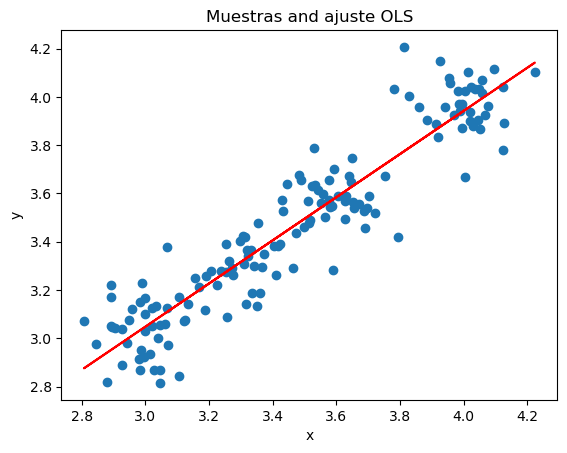

In [19]:
plt.scatter(X, y, marker="o", picker=True)
plt.plot(X, y_pred, color='red')
plt.title(f'Muestras and ajuste OLS')
plt.xlabel('x')
plt.ylabel('y')
plt.show()